<a href="https://colab.research.google.com/github/ckckck1373/LearnPytorch/blob/master/(%E8%8E%AB%E7%85%A93)DataLoader%2COptimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# 小批訓練 DataLoader
     可以有效地迭代數據（要轉成tensor)
```



In [0]:
import torch
import torch.utils.data as Data

BATCH_SIZE = 5

x = torch.linspace(1, 10, 10) #this is x data (torch tensor)
y = torch.linspace(10, 1, 10) #this is y data (torch tensor)

#先轉換成 torch 能識別的 Dataset
torch_dataset = Data.TensorDataset(x, y)

#把 dataset 放入DataLoader
loader = Data.DataLoader(
    dataset = torch_dataset,   #torch TensorDataset format
    batch_size = BATCH_SIZE,   #mini batch size
    shuffle = True,            #要不要打亂數據（打亂比較好）
    num_workers= 2,            #多線程來讀數據（thread)
)

for epoch in range(3): #訓練所有整套數據3次
  for step, (batch_x, batch_y) in enumerate(loader): #每一步loader釋放一小批數據用來學習
    # training part...
    
    print('Epoch', epoch, '| Step', step, '| batch x', batch_x.numpy(), '| batch y:', batch_y.numpy())

Epoch 0 | Step 0 | batch x [ 5. 10.  9.  4.  1.] | batch y: [ 6.  1.  2.  7. 10.]
Epoch 0 | Step 1 | batch x [6. 7. 3. 2. 8.] | batch y: [5. 4. 8. 9. 3.]
Epoch 1 | Step 0 | batch x [ 6.  8.  5. 10.  7.] | batch y: [5. 3. 6. 1. 4.]
Epoch 1 | Step 1 | batch x [2. 1. 9. 3. 4.] | batch y: [ 9. 10.  2.  8.  7.]
Epoch 2 | Step 0 | batch x [ 3. 10.  1.  2.  9.] | batch y: [ 8.  1. 10.  9.  2.]
Epoch 2 | Step 1 | batch x [8. 6. 7. 5. 4.] | batch y: [3. 5. 4. 6. 7.]


#  Optimizer優化器

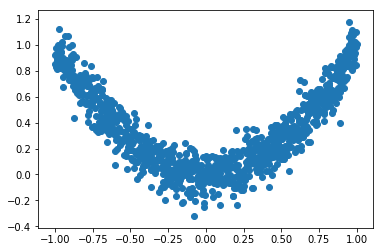

In [3]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1) #reproducible

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

#fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim = 1) # Return evenly spaced numbers over a specified interval. #unsqueeze => 讓他有兩維
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [0]:
#使用上節內容提到的 data loader
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(dataset = torch_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers=2)

#每一個優化器優化一個神經網路
#但是這一些都來自同一個Net形式

class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(1, 20)  #hidden layer
    self.predict = torch.nn.Linear(20, 1) #output layer
 

  def forward(self, x):
    x = F.relu(self.hidden(x)) #activation function for hidden layer
    x = self.predict(x)  #linear output
    return x
  
  
#為了每個優化器去創建一個Net
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]


#loss functions
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr = LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr = LR, momentum = 0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr= LR, alpha = 0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr= LR, betas = (0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]] #記錄training 時不同神經網路的loss

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


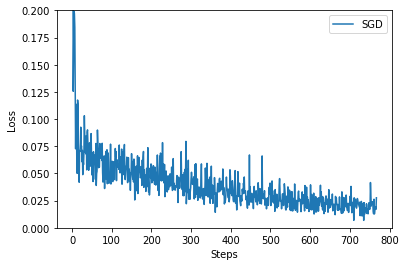

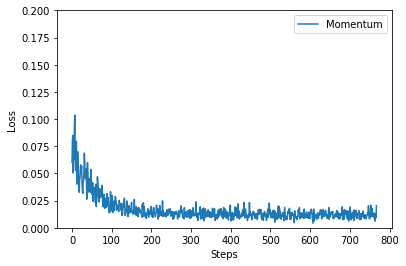

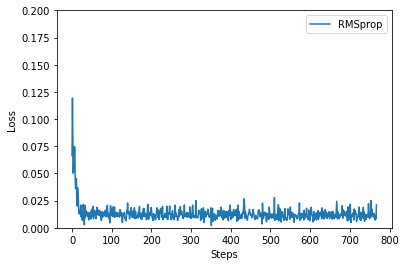

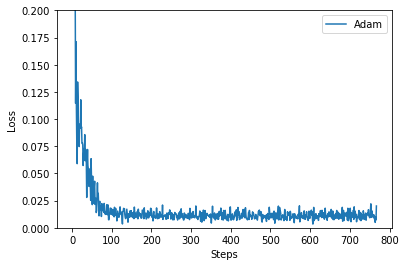

In [10]:
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (b_x, b_y) in enumerate(loader):
        
        # 對每個優化器，優化屬於他的神經網路
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)              # get output for every net
            loss = loss_func(output, b_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            l_his.append(loss.data.numpy())     # loss recoder
            
#畫圖
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
  plt.plot(l_his, label=labels[i])
  plt.legend(loc = 'best')
  plt.xlabel('Steps')
  plt.ylabel('Loss')
  plt.ylim((0, 0.2))
  plt.show()
  

* SGD(stochastic Gradient Desscent) 是最普通的優化器，
  - 把數據拆分成小批小批的，在分批不斷放入NN中計算
  
* Momentum 是加入動量的SGD
  - 像是把原本喝醉的人(原本的優化方式)放到一個斜坡上，只要他往下波的方向走一點點，他就會不自覺的一直往下走，走的彎路也變少了。
  - m = b1 * m - Learning rate * dx <br>
    W+ = m
    
* RMSprop 又是


* Adam

* https://morvanzhou.github.io/tutorials/machine-learning/torch/3-06-A-speed-up-learning/ 